In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,10)

## Question 1

In [2]:
def semi_empirical_mass(A,Z):
    
    '''Calculates the semi empirical mass for a given atomic mass and atomic number.
    
        Inputs: Positive interger values for atomic mass and atomic number
        Outputs: returns binding energy, binding energy per nucleon, atomic mass and atomic number'''
    
    if A < 0 or Z < 0:   #checks for negative numbers
        print('Negative atomic masses and atomic numbers aren\'t real. Please use a postive integer.')
    else:           #calculates semi empirical mass using given values
        a1 = 15.8
        a2 = 18.3
        a3 = .714
        a4 = 23.2
        if A%2 == 1:
            a5 = 0
        elif A%2 == 0 and Z%2 == 0:
            a5 = 12
        else:
            a5 = -12
        p1 = a1 * A
        p2 = a2 * A**(2/3)
        p3 = a3 * (Z**2/A**(1/3))
        p4 = a4 * (A - 2*Z)**2/A
        p5 = a5 / (A**(1/2))
        B = p1 - p2 - p3 - p4 + p5
        return B,B/A,A,Z

def stable_nucleus():
    
    '''Finds the most stable nucleus for a given atomic number.
    
        Inputs: asks user to input a positive integer atomic number
        Outputs: prints a sentence with: atomic number given, total number of nucleons and the binding energy
                 per nucleon of that configuration'''
    
    Z = int(input('Enter atomic number:'))   #asks user for an atomic number
    if Z < 0:                                #quick check for negative numbers
        print('Negative atomic numbers aren\'t real. Please use a postive integer.')
    #runs semi_empirical_mass on all configurations of the nucleus from the input Z
    #with atomic mass range from Z to 3*Z
    else:
        b_energs = []
        a_massl = []
        for i in range(Z,3*Z+1):
            benerg,benergpn,amass,anumber = semi_empirical_mass(i,Z)
            b_energs.append(benergpn)    #appends each binding energy per nucleon to a list
            a_massl.append(amass)        #appends each atomic mass to a list
        b_energsarr = np.array(b_energs) #creates an array for indexing purposes
        a_massarr = np.array(a_massl)    #creates an array for indexing purposes
        ind = np.where(b_energsarr == max(b_energsarr)) #finds the where binding energy per nucleon is at max
    
        #prints how many protons the nucleus has, along with the total number of nucleons where binding energy is maxed as well as what that energy is
        print('A nucleus with '+str(Z)+' protons is most stable with '+str(a_massarr[ind][0])+' total nucleons and a binding energy per nucleon of '+str(b_energsarr[ind][0])+' MeV')
    
def all_stable_nucleus():
    
    '''Finds the most stable nucleus configuration for elements with 1 through 100 protons.
    
        Inputs: none
        Outputs: Prints the number of protons and total number of nucleons for the most stable configuration 
                 for all investigated elements. Prints the atomic number for the element with the highest 
                 binding energy per nucleon and returns a list of max binding energies per nucleon for all
                 investigated elements as well as the atomic number for plotting purposes.'''
    
    #runs semi_empirical_mass for atomic numbers (Z) between 1 and 100 and atomic masses (A) between Z and 3*Z
    a_massmax = []
    b_energmax = []
    Zs = np.array(range(1,101))
    for n in Zs:
        b_energs1 = []
        a_massl1 = []
        for m in range(n,3*n+1):
            benerg1,benergpn1,amass1,anumber1 = semi_empirical_mass(m,n)
            b_energs1.append(benergpn1)      #appends each binding energy per nucleon to a list 
            a_massl1.append(amass1)          #appends each atomic mass to a list
        b_energs1arr = np.array(b_energs1)   #creates an array for indexing
        a_mass1arr = np.array(a_massl1)      #creates an array for indexing
        b_energmax.append(max(b_energs1arr)) #appends the maximum binding energy per nucleon to a list
        ind1 = np.where(b_energs1arr==max(b_energs1arr)) #finds the index where the binding energy per nucleon is maxed
        a_massmax.append(a_mass1arr[ind1][0])
        #prints the number of protons and number of total nucleons for most stable configuration of each element
        print('Number of protons: '+str(n)+' total nucleons: '+str(a_mass1arr[ind1][0]))

    b_energmaxarr = np.array(b_energmax)               #again creates an array for indexing
    indm = np.where(b_energmaxarr==max(b_energmaxarr)) #finds index where binding energy per nucleon is maxed for all elements ie. most stable element
    #prints how many protons the most stable element has
    print('The maximum binding energy per nucleon happens for a nucleus with '+str(Zs[indm][0])+' protons.')
    #returns the max binding energy list and the list of protons for plotting purposes
    return b_energmax, Zs

In [3]:
#parts a and b
bind_energ,energ_pn,atom_mass,atom_number = semi_empirical_mass(58,28)
print('Binding energy of a nucleus with '+str(atom_number)+' protons and '+str(atom_mass)+' total nucleons: '+str(bind_energ)+' MeV')
print('With binding energy per nucleon: '+str(energ_pn)+' MeV')
print('~~~'*20)
#part c
stable_nucleus()
print('~~~'*20)
#part d
binding_energypn_max,protons = all_stable_nucleus()

Binding energy of a nucleus with 28 protons and 58 total nucleons: 497.5620206224374 MeV
With binding energy per nucleon: 8.578655527973059 MeV
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Enter atomic number:9
A nucleus with 9 protons is most stable with 19 total nucleons and a binding energy per nucleon of 7.73697768275634 MeV
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Number of protons: 1 total nucleons: 3
Number of protons: 2 total nucleons: 4
Number of protons: 3 total nucleons: 7
Number of protons: 4 total nucleons: 8
Number of protons: 5 total nucleons: 11
Number of protons: 6 total nucleons: 14
Number of protons: 7 total nucleons: 15
Number of protons: 8 total nucleons: 18
Number of protons: 9 total nucleons: 19
Number of protons: 10 total nucleons: 22
Number of protons: 11 total nucleons: 25
Number of protons: 12 total nucleons: 26
Number of protons: 13 total nucleons: 29
Number of protons: 14 total nucleons: 30
Number of protons: 15 total nuc

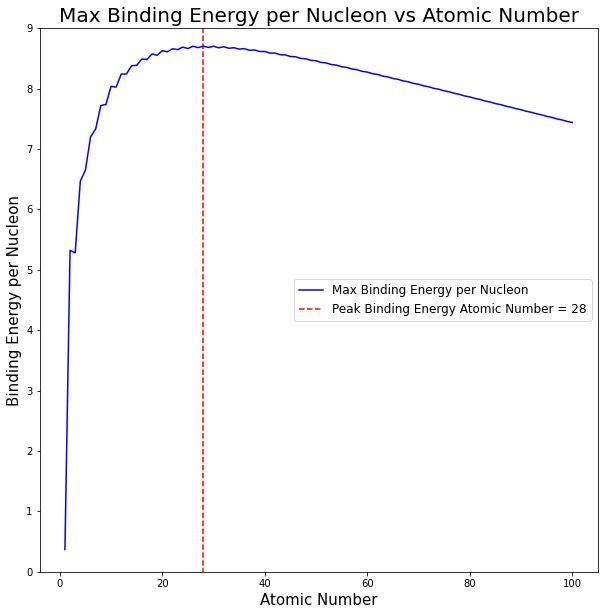

In [4]:
#part e
plt.plot(protons,binding_energypn_max,c='b',label='Max Binding Energy per Nucleon')
plt.title('Max Binding Energy per Nucleon vs Atomic Number',size=20)
plt.xlabel('Atomic Number',size=15)
plt.ylabel('Binding Energy per Nucleon',size=15)
plt.vlines(28,-2,10,linestyle='dashed',color='r',label='Peak Binding Energy Atomic Number = 28')
plt.ylim(0,9)
plt.legend(fontsize=12,loc='right')